# demo02_poly.ipynb   多项式回归模型

0.9696498879448306


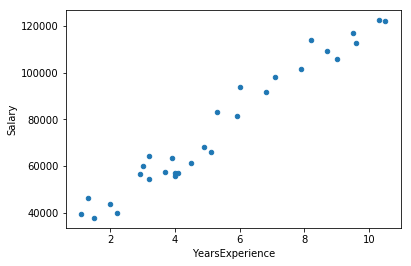

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../data/Salary_Data.csv')
x = data.loc[:, :'YearsExperience']   # 保证 x 是二维数组
y = data['Salary']

# 基于sklearn的API，训练线性回归模型
import sklearn.linear_model as lm
import sklearn.utils as su
# 打乱数据集，拆分测试集与训练集  su.shuffle提供了打乱算法，给出x、y及随机种子
# random_state：
#  随机种子，当执行多次shuffle时，若每次的随机种子相同，则得到的随机结果一致。
data_x, data_y = su.shuffle(x, y, random_state=7)
# 拆分测试集与训练集   
train_x, test_x, train_y, test_y = \
    data_x.iloc[:25], data_x.iloc[25:], data_y[:25], data_y[25:]

# 重新训练模型
model = lm.LinearRegression()
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x) # 测试集的预测输出

# 基于slearn.metrics模块提供的评估算法，评估模型的误差
import sklearn.metrics as sm
print(sm.r2_score(test_y, pred_test_y))

data.plot.scatter(x='YearsExperience', y='Salary')


In [96]:
## 训练多项式回归模型  观察与线性回归模型的效果

import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm

model = pl.make_pipeline(
    sp.PolynomialFeatures(10), lm.LinearRegression())
model.fit(train_x, train_y)
# 针对测试数据进行测试
pred_train_y = model.predict(train_x)
print(sm.r2_score(train_y, pred_train_y))
# 针对测试数据进行测试
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
 

0.9819223886492171
0.9631870834637946


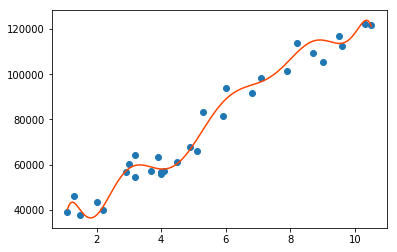

In [97]:
## 绘制多项式模型图像
x, y = data['YearsExperience'], data['Salary']
polyx = np.linspace(x.min(), x.max(), 200)
polyx = polyx.reshape(-1, 1)
polyy = model.predict(polyx)
plt.figure('PolyFit')
plt.scatter(x, y)
plt.plot(polyx, polyy, color='orangered')